In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

Using TensorFlow backend.


In [2]:
classes = os.listdir('Training')

In [3]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3]]) 
def names(number):
    if(number == 0):
        return classes[0]
    elif(number == 1):
        return classes[1]
    elif(number == 2):
        return classes[2]
    elif(number == 3):
        return classes[3]

In [ ]:
trainData = []
trainLabel = []
dim = (150, 150)
trainPath = "Training"
index = 0
for dir in os.listdir(trainPath):
    filePaths = []
    subDir = os.path.join(trainPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        trainData.append(np.array(x))
        trainLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel).reshape(2870, 4)
print(trainData.shape)
print(trainLabel.shape)

glioma_tumor
glioma_tumor
meningioma_tumor
meningioma_tumor


In [11]:
testData = []
testLabel = []
dim = (150, 150)
testPath = "Testing"
index = 0
for dir in os.listdir(testPath):
    filePaths = []
    subDir = os.path.join(testPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        testData.append(np.array(x))
        testLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
testData = np.array(testData)
testLabel = np.array(testLabel).reshape(394, 4)
print(testData.shape)
print(testLabel.shape)

glioma_tumor
glioma_tumor
meningioma_tumor
meningioma_tumor
no_tumor
no_tumor
pituitary_tumor
pituitary_tumor
(394, 150, 150, 3)
(394, 4)


In [ ]:
trainData

In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))           
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='adam')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [13]:
history = model.fit(trainData, trainLabel,batch_size = 32, epochs = 19, verbose=1,validation_data=(testData, testLabel))

Train on 2870 samples, validate on 394 samples
Epoch 1/19
2870/2870 [==============================] - 61s 21ms/step - loss: 8.4050 - val_loss: 1.7669
Epoch 2/19
2870/2870 [==============================] - 58s 20ms/step - loss: 0.5708 - val_loss: 1.6013
Epoch 3/19
2870/2870 [==============================] - 60s 21ms/step - loss: 0.3449 - val_loss: 2.2025
Epoch 4/19
2870/2870 [==============================] - 58s 20ms/step - loss: 0.2105 - val_loss: 3.6411
Epoch 5/19
2870/2870 [==============================] - 58s 20ms/step - loss: 0.1920 - val_loss: 4.2397
Epoch 6/19
2870/2870 [==============================] - 58s 20ms/step - loss: 0.1535 - val_loss: 5.5061
Epoch 7/19
2870/2870 [==============================] - 58s 20ms/step - loss: 0.1200 - val_loss: 4.7844
Epoch 8/19
2870/2870 [==============================] - 58s 20ms/step - loss: 0.1042 - val_loss: 6.3835
Epoch 9/19
2870/2870 [==============================] - 57s 20ms/step - loss: 0.0861 - val_loss: 5.8448
Epoch 10/19
2870/

In [14]:
model.save("brain-tumor-model.h5")

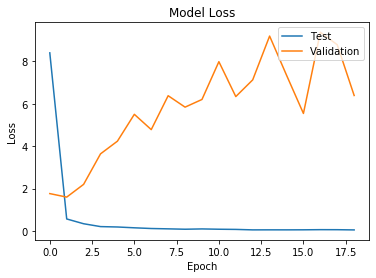

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

1
93.41655969619751% Confidence This Is meningioma_tumor
2
97.70320057868958% Confidence This Is no_tumor
3
99.91938471794128% Confidence This Is no_tumor
4
99.97100234031677% Confidence This Is meningioma_tumor
5
error
6
82.354074716568% Confidence This Is no_tumor
7
77.75080800056458% Confidence This Is meningioma_tumor
8
99.97685551643372% Confidence This Is meningioma_tumor
9
99.90561604499817% Confidence This Is no_tumor
10
error
11
65.38827419281006% Confidence This Is no_tumor
12
error
13
100.0% Confidence This Is meningioma_tumor
14
error
15
96.33665680885315% Confidence This Is no_tumor
16
99.92544054985046% Confidence This Is no_tumor
17
error
18
93.90403628349304% Confidence This Is meningioma_tumor
19
91.65197014808655% Confidence This Is no_tumor
20
74.61628317832947% Confidence This Is no_tumor
21
99.99480247497559% Confidence This Is no_tumor
22
75.48627257347107% Confidence This Is no_tumor
23
86.6783082485199% Confidence This Is no_tumor
24
error
25
68.27675104141235% 

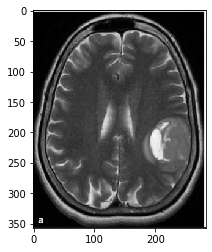

In [62]:
for i in range(1,100):
    print(i)
    try:
        strx = 'Testing/yes/Y'+ str(i) +'.jpg'
        img = Image.open(strx)
        x = np.array(img.resize(dim))
        x = x.reshape(1,150,150,3)
        answ = model.predict_on_batch(x)
        classification = np.where(answ == np.amax(answ))[1][0]
        imshow(img)
        print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))
    except:
        print('error')

In [59]:
strx = 'Testing/no/'+ 10 +' no.jpg'
img = Image.open(strx)
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

TypeError: can only concatenate str (not "int") to str

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()